# LAMP API Example

Import all packages/prerequisites.

In [2]:
# Import LAMP
from lamp import LAMP
LAMP.connect('http://localhost:3384', 'root', 'root', 'lampadmin')

# Imports for graphing/plotting.
import numpy as np
import matplotlib.pyplot as plt

# Geocoding to make up for LAMP addresses.
from geopy.geocoders import Nominatim
from geopy import distance
geo = Nominatim(user_agent="LAMP_Test", timeout=2)

# Imports for convenience.
import calendar, datetime

## Load all data for Delilah.

1. Load all data for Delilah, whose id is 'U1684566141'.
1. Get JewelsTrailsA totals.
1. Calculate relative distance from BIDMC for each coordinate/location.

In [3]:
delilah = LAMP.Participant.view('U1684566141')
res = LAMP.Result.all_by_participant(delilah.id)
locs = LAMP.EnvironmentEvent.all_by_participant(delilah.id)

In [4]:
totals = [x.summary['total_jewels_collected'] for x in res if x.name == 'JewelsTrailsA']

AttributeError: 'Result' object has no attribute 'name'

In [17]:
locations = [geo.geocode(x.coordinates) for x in locs]
locations = [distance.distance((x.latitude, x.longitude), (42.3397844, -71.1069899)).miles for x in locations if x is not None] 

## Make a plot of the data.

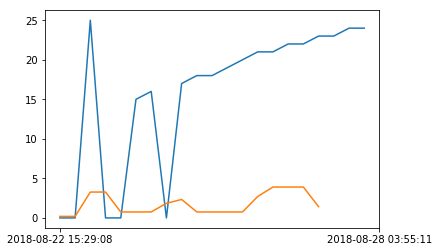

In [15]:
plt.plot(totals)
plt.plot(locations)
plt.xticks([0, len(totals)], [datetime.datetime.utcfromtimestamp(x.timestamp) for x in [locs[0], locs[-1]]])
plt.show()

The end!